<a href="https://colab.research.google.com/github/yuva-01997656/cs480student/blob/main/CS480_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

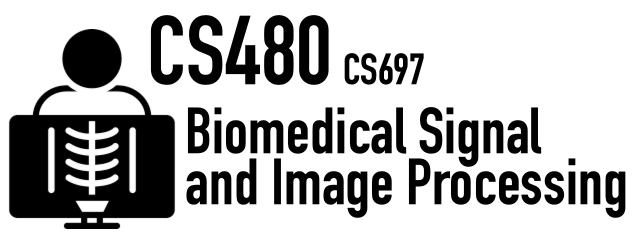
#Assignment 7

In [1]:
# In this assignment, we will explore the Imaging Data Commons,
# a new service from the National Cancer Institute.
#
# We will find and explore a PET dataset and then perform a MIP reconstruction.

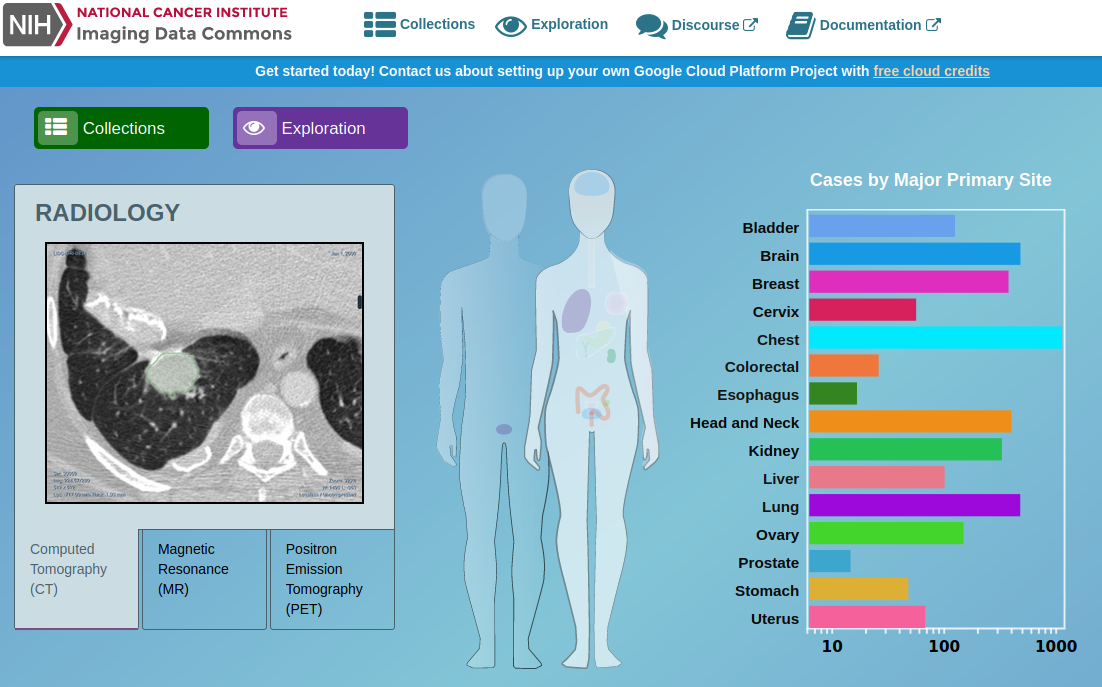

**Task 1**: Browse the IDC datasets and find a combined CT or MRI with PET! [15 Points]

In [2]:
#
# Visit https://portal.imaging.datacommons.cancer.gov/ and find a dataset
# that includes structural imaging such as CT or MRI combined with a PET scan.
#
# You can start by selecting the type of a cancer case such as Bladder, Brain etc.
# Hint: Head and Neck include many PET scans.
#

In [3]:
# TODO: Open the integrated OHIF viewer to view the data.
#
# 1) Select a collection, then a case, then a study in the IDC interface.
# 2) To open the OHIF viewer, click on the view icon.
# 3) Paste a screenshot of the viewer after the data was loaded below.
#

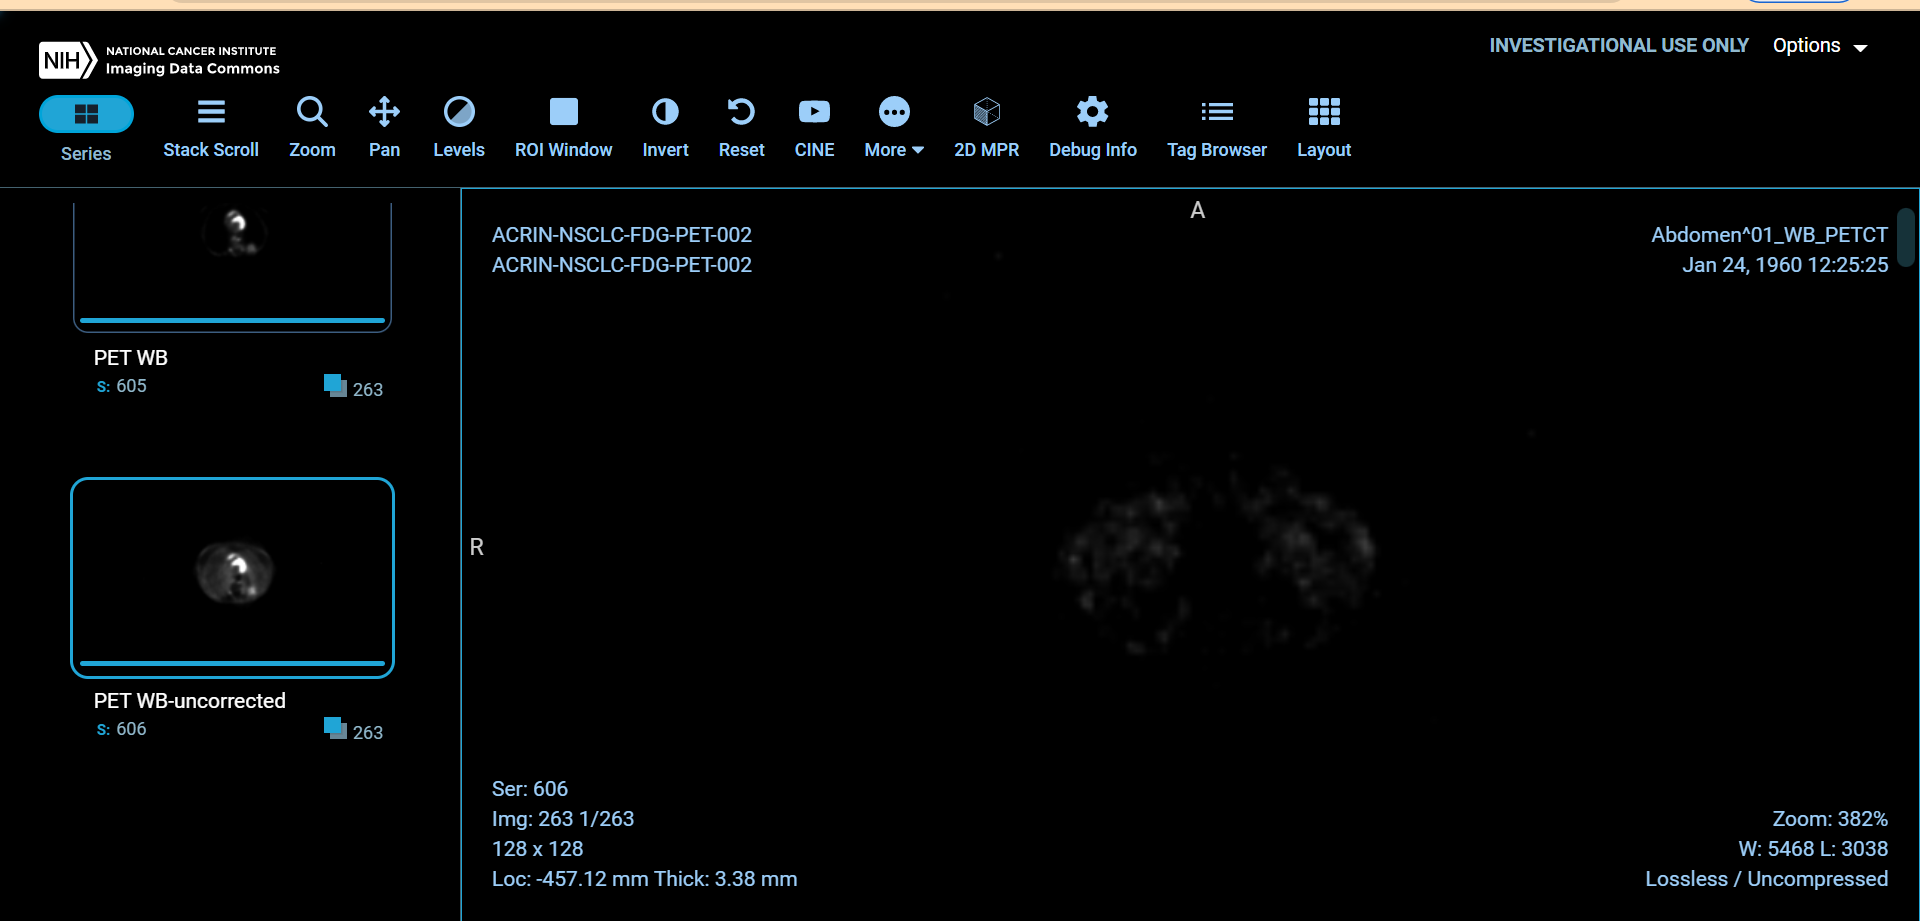

TODO: Add screenshot

**Task 2**: Visualize structural and PET side-by-side! [30 Points]

In [4]:
# In the OHIF viewer, please change the layout to show the structural image
# next to the PET scan.
#
# TODO: Use the LAYOUT functionality in the toolbar to switch to a 2-column layout.

In [5]:
# TODO: Find the cancerous lesion.
#
# 1) Navigate through the PET image to find the cancerous lesion.

In [6]:
# TODO: Sync the structural scan (CT or MR) to the PET scan with the lesion.
#
# Hint: The "Loc" label in the bottom left of both scans should roughly match.
# Hint 2: The Levels tool allows Window/Level adjustment to increase contrast.
#

In [7]:
# TODO: Paste a screenshot showing the 2-column layout below.

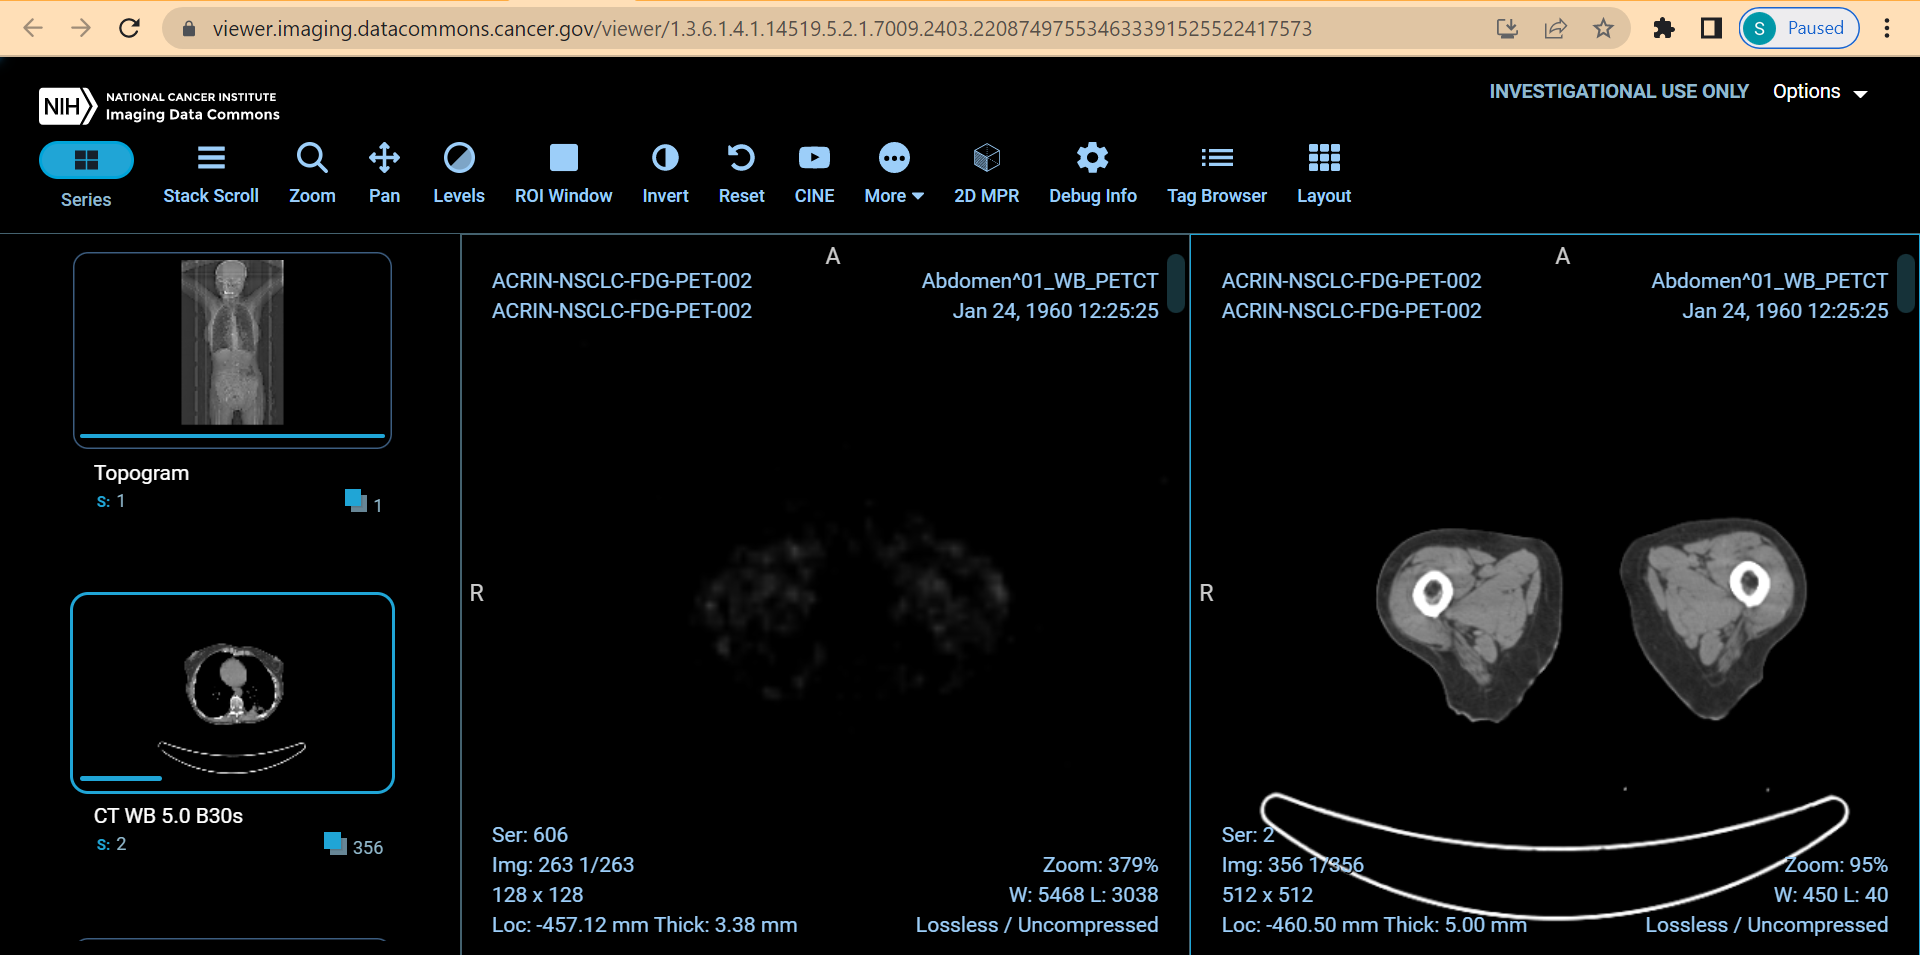

TODO: Add screenshot

**Task 3**: Use an MIP to reslice the PET scan! [35 Points]

In [8]:
# We will now use the 2D MPR functionality to look at the lesion from different
# orientations.
#
# Hint: This works best in Google Chrome.

In [9]:
# Question 1): What is MPR?
#

Multi-plane reconstruction or reconstruction (MPR) is the process of transforming data from an imaging modality acquired in one plane (usually axial) to another. This is typically done using thin slice data from volume CT of axial faces, but  can be done using any face and  modality that can provide cross-sectional imaging such as PET, MRI,  SPECT.

In [10]:
# TODO: YOUR ANSWER

In [11]:
# Question 2): What is the difference between MIP, MinIP, AvgIP?
#

In [12]:
# TODO: YOUR ANSWER

MIP : For any 2D image, MIP is a feature that mainly highlights the voxel with the greatest attenuation value at all the viewings with full volume. MIP can be able to locate all hyperdensing structures in a volume within a particular range. This approach thelps to reveal contrasting bone structures and also concealing lower attenuation structures easily.

MinIP: MinIP follows the same procedure as  MIP. Instead of displaying the voxels with the highest attenuation, the voxels with the lowest attenuation are displayed. MinIP primarily exhibits a low density structure of volume, making it  an excellent tool for detecting, identifying, and quantifying frosted glass and linear decay patterns during breast scans. MinIP is a very useful technique for analyzing the pancreatic  and bile ducts, which are less dense than the surrounding tissue, mainly at the pancreatic stage.

AvgIP: AvgIP works much like the present depth projection modes, however rather than showing the highest/lowest attenuation, it us with a show of common attenuation. This approach is used to locate the indoors structure of strong organs and additionally the partitions of hole systems like intestines and blood vessels.

In [13]:
# Now, please navigate to the lesion in all 3 orientations.
#
# TODO: Paste a screenshot below.
#

TODO: Add screenshot

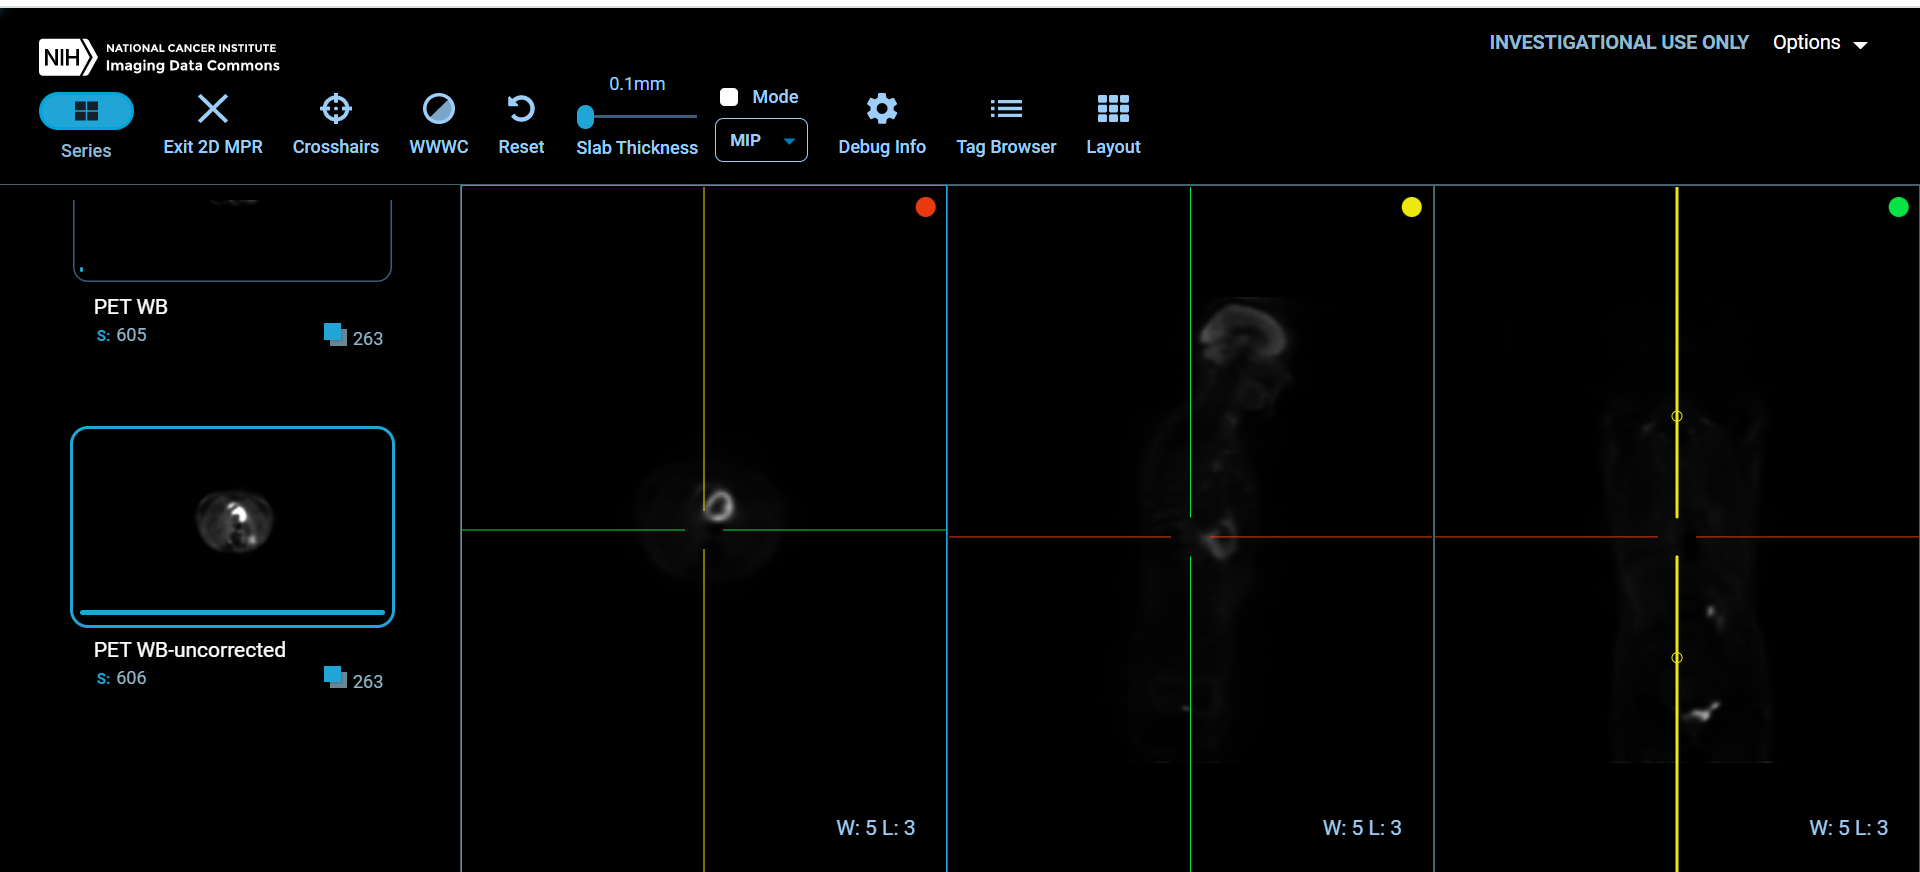

In [14]:
# Question 3): What does the Slab Thickness slider do?
#

The slab thickness slider actually controls the slice thickness as needed

In [15]:
# TODO: YOUR ANSWER

**Task 4**: Let's access the pixel data! [20 Points]

In [16]:
# Please EXIT THE 2D MPR.
#
# We will now grab the pixel data of the currently displayed slice
# using the Javascript console.
#

In [17]:
# 1) Open the Developer Tools of your browser and access the JS console.
#

In [18]:
# 2) The following code allows to access the pixel data of the slice that
# is currently displayed.
#
# element = cornerstone.getEnabledElements()[0];
# pixels = element.image.getPixelData();
#

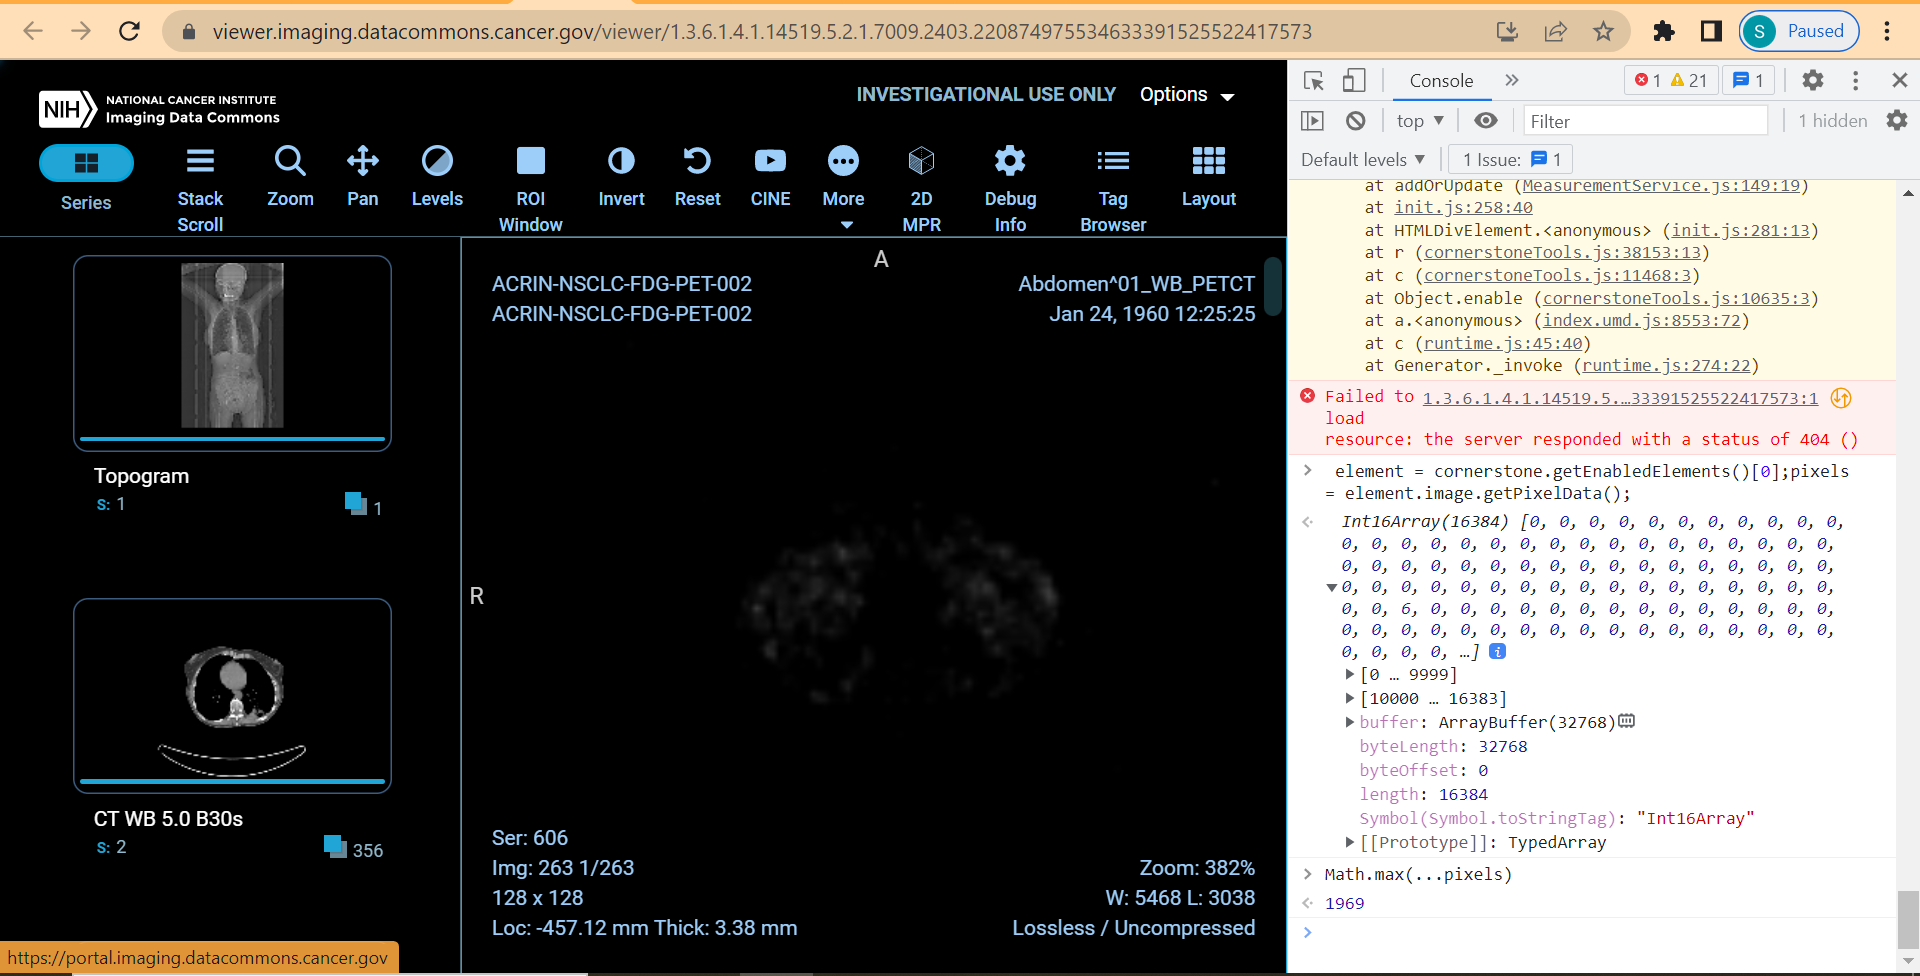

In [19]:
# Question 4): What is the maximum pixel value of the current slice?
#
# Hint: There are multiple ways of doing this according to
# https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621
#

In [20]:
# TODO: YOUR ANSWER

The Maximum Pixel value we got is 1969

**Bonus**: Apply a filter mask to the current slice! [33 Points]


In [21]:
# Here we will modify the pixel data!
#
# The following code allows you to set the pixels of the current slice.
#
#   pixels.set(new_pixels);
#
# Write code to APPLY A FILTER MASK to the pixels.
#
# Hint: You can use the following code to get the dimensions of the current slice.
#   w = element.image.width;
#   h = element.image.height;
#
# You can decide which filter mask to apply (e.g., Gaussian blur, edge detection..).
#
# ** IMPORTANT **
# Hint 2: Triggering a REDRAW programmatically might be hard but you can use
# the LEVELS tool to manually trigger a redraw to see filtered pixels.
# ** IMPORTANT **

In [22]:
#
#
# TODO: YOUR CODE GOES HERE
#
#



```
# This is formatted as code
element = cornerstone.getEnabledElements()[0];
pixels = element.image.getPixelData();
temp_pixels  =Array.from(pixels);

w = element.image.width;
h = element.image.height;

var pixels_reshape = [];
while(temp_pixels.length) pixels_reshape.push(temp_pixels.splice(0,w));

var temp_new_pixels = new Array(h);
for (i=0; i < temp_new_pixels.length; i++){
  temp_new_pixels[i]=new Array(w);
  temp_new_pixels[i].fill(0)
}

for (var i = 1; i < h-1; i++) {
  for (var j = 1; j < w-1; j++) {
    var UpperLeft = pixels_reshape[i-1][j-1];
    var UpperMiddle = pixels_reshape[i-1][j];
    var UpperRight = pixels_reshape[i-1][j+1];
    var CenterLeft = pixels_reshape[i][j-1];
    var CenterMiddle = pixels_reshape[i][j];
    var CenterRight = pixels_reshape[i][j+1];
    var LowerLeft = pixels_reshape[i+1][j-1];
    var LowerMiddle = pixels_reshape[i+1][j];
    var LowerRight = pixels_reshape[i+1][j+1];
    var valx = UpperLeft + CenterLeft*2 + LowerLeft - UpperRight - CenterRight*2 - LowerRight;
    var valy = UpperLeft + UpperMiddle*2 + UpperRight - LowerLeft - LowerMiddle*2 - LowerRight;

    temp_new_pixels[i][j]=Math.abs(valx)+Math.abs(valy);    
  }
}

var new_pixels = Array.prototype.concat.apply([], temp_new_pixels);
pixels.set(new_pixels);
cornerstone.renderGrayscaleImage(element, true)
```



In [23]:
# TODO: Please add a screenshot after filtering the current slice.

TODO: ADD SCREENSHOT

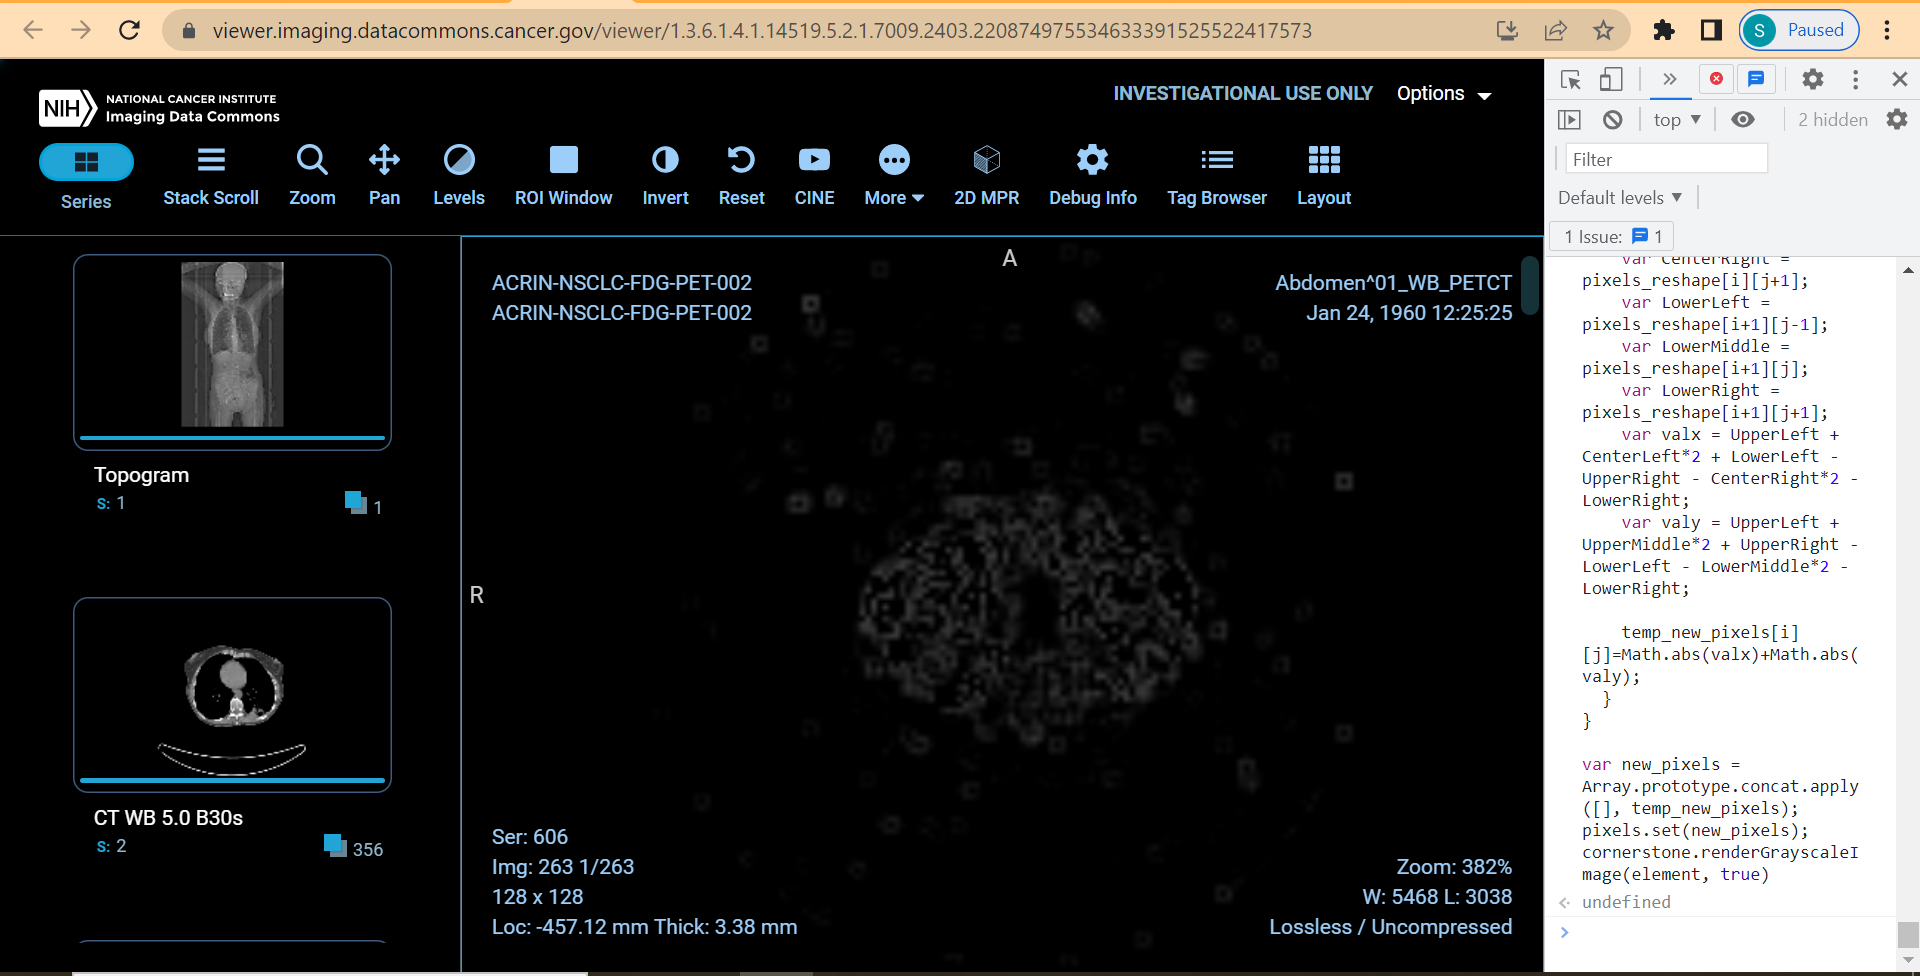

In [24]:
#
# SUPER BONUS (+33 extra): Can you trigger the redraw programmatically?
#

In [25]:
# TODO: YOUR CODE FOR REDRAW GOES HERE



```
# This is formatted as code
cornerstone.renderGrayscaleImage(element, true)
```



In [26]:
#
# THANK YOU!!!
#
#       .--..--..--..--..--..--.
#     .' \  (`._   (_)     _   \
#   .'    |  '._)         (_)  |
#   \ _.')\      .----..---.   /
#   |(_.'  |    /    .-\-.  \  |
#   \     0|    |   ( O| O) | o|
#    |  _  |  .--.____.'._.-.  |
#    \ (_) | o         -` .-`  |
#     |    \   |`-._ _ _ _ _\ /
#     \    |   |  `. |_||_|   |
#     | o  |    \_      \     |     -.   .-.
#     |.-.  \     `--..-'   O |     `.`-' .'
#   _.'  .' |     `-.-'      /-.__   ' .-'
# .' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
# `-._  `.  |________/\_____|    `-.'
#    .'   ).| '=' '='\/ '=' |
#    `._.`  '---------------'
#            //___\   //___\
#              ||       ||
#     LGB      ||_.-.   ||_.-.
#             (_.--__) (_.--__)
#
#